# 1. Introducción

In [17]:
!pwd

/Users/Gomez023/Postdoc/develop


## 1.1. Sitios web:

Existen diversos portales web donde se pueden explorar, acceder y/o descargar diferentes datos marinos.

Aquí algunos ejemplos:
* Copernicus:
    * Marino : https://data.marine.copernicus.eu/products 
    * Clima : https://cds.climate.copernicus.eu/#!/search?text= 
* PODAAC (EEUU) https://podaac.jpl.nasa.gov/ 
* CDOM (Chile) http://www.cdom.cl/ (csv)
* Datos animales marinos https://seamap.env.duke.edu/ 
* Brazilian National Buoy Program: https://www.marinha.mil.br/chm/dados-do-goos-brasil/pnboia 
* GEBCO https://www.gebco.net/ 
* EMODnet https://emodnet.ec.europa.eu/en 
* SEAdatanet https://www.seadatanet.org/ 
* Repositorio de CSIRO (Australia) https://portal.aodn.org.au/search
* SOEST (EEUU) http://apdrc.soest.hawaii.edu/dods/public_data 
* Ifremer (Francia) https://www.seanoe.org/search

Algunos portales requieren regsitrarse gratuitamente antes de poder acceder a los datos (por ejemplo los de Copernicus), pero la mayoría de estos permiten acceso directo gratuito!

## 1.2. Métodos de acceso a los datos

Desde estos portales web, se puede acceder a los datos marinos de distintas formas.  
* Servicios de interoperabilidad (i.e. ERDDAP, THREDDS)
* Mediante descarga individual (o agrupada) de los ficheros en distiintos formatos

Dentro de los distintos formato de acceso y descarga , estos son algunos de los más communes:
* THREDDS
* NetCDF Subset
* ERDDAP
* OPeNDAP
* WMS

Algunos de estos metodos permiten la descarga de los datos a su computadora local y otros el acceso a ellos mediante un enlace web (URL)


# 2. Ejemplos de código:

1) PODAAC via OpenDap

2) Datos de satelite de viento

3) Datos de satelite de olejae

4) Wavewatch 3

5) Datos de Gliders

6) Tutorial en R de Enrique Montes

In [1]:
# output)diags venv
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import xarray as xr
import cf_xarray
import folium
import seawater as sw
from palettable import cmocean
import datetime
import json
from erddapy import ERDDAP

## 2.1. Viento

Base de datos: PODAAC https://podaac.jpl.nasa.gov/

Para encontrar los enlaces
--> Access data --> OpeNDAP

Metodo: OpenDAP

Fuente: https://github.com/oceanhackweek/ohw22-proj-oleaje-costeros/blob/main/Satellite_data/Podaac_example.ipynb

### 1.1. Carga de datos:

In [2]:
url_viento_01 = "https://opendap.jpl.nasa.gov/opendap/OceanWinds/quikscat/L3/jpl/v2/hdf/2009/QS_XWGRD3_2009001.20090021525.gz?asc_avg_wind_speed_sq[0:1:719][0:1:1439],des_avg_wind_speed_sq[0:1:719][0:1:1439]"


In [3]:
ds = xr.open_dataset(url_viento_01)
#ds.cf
ds

<xarray.Dataset>
Dimensions:                (fakeDim12: 720, fakeDim13: 1440, fakeDim14: 720, fakeDim15: 1440)
Dimensions without coordinates: fakeDim12, fakeDim13, fakeDim14, fakeDim15
Data variables:
    asc_avg_wind_speed_sq  (fakeDim12, fakeDim13) float64 ...
    des_avg_wind_speed_sq  (fakeDim14, fakeDim15) float64 ...
Attributes:
    LongName:                          char\n1\nQuikSCAT Level 3 Ocean Wind V...
    ShortName:                         char\n1\nQSCATL3\n
    producer_agency:                   char\n1\nNASA\n
    producer_institution:              char\n1\nJPL\n
    PlatformType:                      char\n1\nspacecraft\n
    InstrumentShortName:               char\n1\nSeaWinds\n
    PlatformLongName:                  char\n1\nNASA Quick Scatterometer\n
    PlatformShortName:                 char\n1\nQuikSCAT\n
    project_id:                        char\n1\nQuikSCAT\n
    data_format_type:                  char\n1\nNCSA HDF\n
    ProductionDateTime:                char\n1\n2009-002T15:25:01.000\n
    HDF_version_id:                    char\n1\n4.1r3\n
    date_of_average:                   char\n1\n2009-001\n
    l3_rows:                           int\n1\n720\n
    l3_columns:                        int\n1\n1440\n
    l2b_input_files:                   char\n15\n/QS_S2B49662.20090012038\n/Q...
    asc_avg_wind_speed_dim_0.name:     fakeDim0
    asc_avg_wind_speed_dim_1.name:     fakeDim1
    des_avg_wind_speed_dim_0.name:     fakeDim2
    des_avg_wind_speed_dim_1.name:     fakeDim3
    asc_avg_wind_vel_u_dim_0.name:     fakeDim4
    asc_avg_wind_vel_u_dim_1.name:     fakeDim5
    des_avg_wind_vel_u_dim_0.name:     fakeDim6
    des_avg_wind_vel_u_dim_1.name:     fakeDim7
    asc_avg_wind_vel_v_dim_0.name:     fakeDim8
    asc_avg_wind_vel_v_dim_1.name:     fakeDim9
    des_avg_wind_vel_v_dim_0.name:     fakeDim10
    des_avg_wind_vel_v_dim_1.name:     fakeDim11
    asc_avg_wind_speed_sq_dim_0.name:  fakeDim12
    asc_avg_wind_speed_sq_dim_1.name:  fakeDim13
    des_avg_wind_speed_sq_dim_0.name:  fakeDim14
    des_avg_wind_speed_sq_dim_1.name:  fakeDim15
    asc_wvc_count_dim_0.name:          fakeDim16
    asc_wvc_count_dim_1.name:          fakeDim17
    des_wvc_count_dim_0.name:          fakeDim18
    des_wvc_count_dim_1.name:          fakeDim19
    asc_time_frac_dim_0.name:          fakeDim20
    asc_time_frac_dim_1.name:          fakeDim21
    des_time_frac_dim_0.name:          fakeDim22
    des_time_frac_dim_1.name:          fakeDim23
    asc_rain_prob_dim_0.name:          fakeDim24
    asc_rain_prob_dim_1.name:          fakeDim25
    des_rain_prob_dim_0.name:          fakeDim26
    des_rain_prob_dim_1.name:          fakeDim27
    asc_rain_flag_dim_0.name:          fakeDim28
    asc_rain_flag_dim_1.name:          fakeDim29
    des_rain_flag_dim_0.name:          fakeDim30
    des_rain_flag_dim_1.name:          fakeDim31

### 1.2. Visualizado rápido de los datos

In [4]:
# Comprobamos las dimensiones de una de las variables:
ds.asc_avg_wind_speed_sq.shape


(720, 1440)

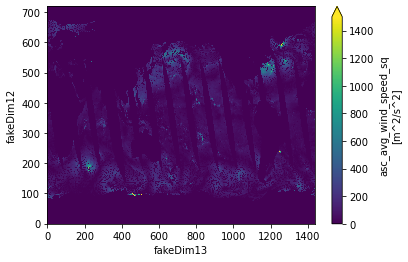

In [5]:
ds.asc_avg_wind_speed_sq.plot(vmax=1500)

### 1.3. Procesado básico:

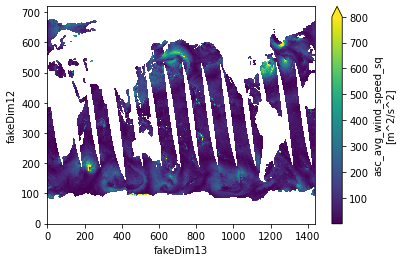

In [6]:
# Seleccionamos solo los valores mayores de 0, que son los valores nulos (enmascarados)
ds = ds.where(ds > 0)

# Y volvemos a graficarlos:
ds.asc_avg_wind_speed_sq.plot(vmax=800)


## 2. Vientos (segundo ejemplo)

Base de datos: PODAAC https://podaac.jpl.nasa.gov/

Para encontrar los enlaces
--> Access data --> OpeNDAP

Metodo: THREDDS

Fuente: https://github.com/oceanhackweek/ohw22-proj-oleaje-costeros/blob/main/Satellite_data/Podaac_example.ipynb

### 2.1. Carga de datos:

In [7]:
# https://thredds.jpl.nasa.gov/thredds/dodsC/ncml_aggregation/OceanWinds/qscat/jpl/aggregate__QSCAT_LEVEL_3_V2.ncml.html
url_viento_02 = "https://thredds.jpl.nasa.gov/thredds/dodsC/ncml_aggregation/OceanWinds/qscat/jpl/aggregate__QSCAT_LEVEL_3_V2.ncml?time[0:1:3803],asc_avg_wind_speed[0:1:380][0:1:719][0:1:1439],des_avg_wind_speed[0:1:380][0:1:719][0:1:1439],lat[0:1:719],lon[0:1:1439]"


In [8]:
ds = xr.open_dataset(url_viento_02)
#ds.cf
ds

<xarray.Dataset>
Dimensions:             (lat: 720, lon: 1440, time: 3804, time_1: 381)
Coordinates:
  * time                (time) datetime64[ns] 1999-07-19 ... 2009-11-21
  * lat                 (lat) float64 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon                 (lon) float64 0.125 0.375 0.625 ... 359.4 359.6 359.9
Dimensions without coordinates: time_1
Data variables:
    asc_avg_wind_speed  (time_1, lat, lon) float32 ...
    des_avg_wind_speed  (time_1, lat, lon) float32 ...
Attributes:
    LongName:                   char\n1\nQuikSCAT Level 3 Ocean Wind Vectors ...
    ShortName:                  char\n1\nQSCATL3\n
    producer_agency:            char\n1\nNASA\n
    producer_institution:       char\n1\nJPL\n
    PlatformType:               char\n1\nspacecraft\n
    InstrumentShortName:        char\n1\nSeaWinds\n
    PlatformLongName:           char\n1\nNASA Quick Scatterometer\n
    PlatformShortName:          char\n1\nQuikSCAT\n
    project_id:                 char\n1\nQuikSCAT\n
    data_format_type:           char\n1\nNCSA HDF\n
    ProductionDateTime:         char\n1\n2007-052T19:06:33.000\n
    HDF_version_id:             char\n1\n4.1r3\n
    date_of_average:            char\n1\n2000-226\n
    l3_rows:                    int\n1\n720\n
    l3_columns:                 int\n1\n1440\n
    l2b_input_files:            char\n16\n/QS_S2B05990.20070521451\n/QS_S2B05...
    _History:                   Direct read of HDF4 file through CDM library
    HDF4_Version:               4.1.3 (NCSA HDF Version 4.1 Release 3, May 1999)
    start_date:                 1999-07-19 UTC
    start_time:                 00:00:00 UTC
    stop_date:                  2009-11-21 UTC
    stop_time:                  23:59:59 UTC
    EXTRA_DIMENSION.fakeDim2:   720
    EXTRA_DIMENSION.fakeDim3:   1440
    EXTRA_DIMENSION.fakeDim4:   720
    EXTRA_DIMENSION.fakeDim5:   1440
    EXTRA_DIMENSION.fakeDim6:   720
    EXTRA_DIMENSION.fakeDim7:   1440
    EXTRA_DIMENSION.fakeDim8:   720
    EXTRA_DIMENSION.fakeDim9:   1440
    EXTRA_DIMENSION.fakeDim10:  720
    EXTRA_DIMENSION.fakeDim11:  1440
    EXTRA_DIMENSION.fakeDim12:  720
    EXTRA_DIMENSION.fakeDim13:  1440
    EXTRA_DIMENSION.fakeDim14:  720
    EXTRA_DIMENSION.fakeDim15:  1440
    EXTRA_DIMENSION.fakeDim16:  720
    EXTRA_DIMENSION.fakeDim17:  1440
    EXTRA_DIMENSION.fakeDim18:  720
    EXTRA_DIMENSION.fakeDim19:  1440
    EXTRA_DIMENSION.fakeDim20:  720
    EXTRA_DIMENSION.fakeDim21:  1440
    EXTRA_DIMENSION.fakeDim22:  720
    EXTRA_DIMENSION.fakeDim23:  1440
    EXTRA_DIMENSION.fakeDim24:  720
    EXTRA_DIMENSION.fakeDim25:  1440
    EXTRA_DIMENSION.fakeDim26:  720
    EXTRA_DIMENSION.fakeDim27:  1440
    EXTRA_DIMENSION.fakeDim28:  720
    EXTRA_DIMENSION.fakeDim29:  1440
    EXTRA_DIMENSION.fakeDim30:  720
    EXTRA_DIMENSION.fakeDim31:  1440

### 2.2. Visualizado rápido de los datos

In [9]:
# Comprobamos las dimensiones de una de las variables:
ds.asc_avg_wind_speed.shape


(381, 720, 1440)

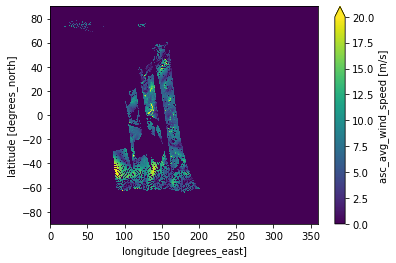

In [10]:
ds.asc_avg_wind_speed[0,:,:].plot(vmax=20)

### 2.3. Procesado básico:

In [ ]:
# Como en este caso los datos son muy pesados, primero seleccionamos un subselección del DataArray (da) de la variable: asc_avg_wind_speed
da_sub = da_sub.where(da_sub > 0)

# Seleccionamos solo los valores mayores de 0, que son los valores nulos (enmascarados)
da_sub = ds.asc_avg_wind_speed[0,100:650,200:900]

# esto puede tardar un poco...

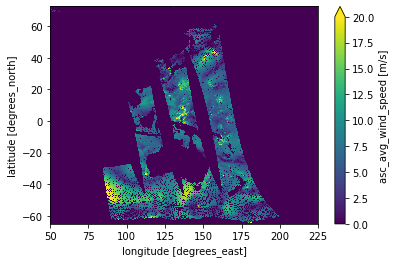

In [20]:
# Y volvemos a graficarlos:
da_sub.plot(vmax=20)


## 3. Oleaje

Base de datos: PODAAC https://podaac.jpl.nasa.gov/

Para encontrar los enlaces
--> Access data --> OpeNDAP

Metodo: OpenDAP

Fuente: https://github.com/oceanhackweek/ohw22-proj-oleaje-costeros/blob/main/Satellite_data/Podaac_example.ipynb

In [11]:
url_oleaje_01 = "https://opendap.jpl.nasa.gov/opendap/SeaSurfaceTopography/jason3/preview/L2/GPS-OGDR/c103/JA3_GPSOPR_2PdS103_001_20181124_205057_20181124_224542.nc?time[0:1:6670],lat[0:1:6670],lon[0:1:6670],swh_ku[0:1:6670],ssha[0:1:6670]"


In [13]:
ds = xr.open_dataset(url_oleaje_01)
ds

<xarray.Dataset>
Dimensions:  (time: 6671)
Coordinates:
  * time     (time) datetime64[ns] 2018-11-24T20:50:57.478607232 ... 2018-11-...
    lat      (time) float64 ...
    lon      (time) float64 ...
Data variables:
    swh_ku   (time) float32 ...
    ssha     (time) float32 ...
Attributes:
    Conventions:                      CF-1.1
    title:                            GPSOGDR - Reduced dataset
    institution:                      NOAA(OGDR) JPL(GPSOGDR)
    source:                           radar altimeter
    history:                          2018-11-25 02:22:06 : Append gps_alt an...
    contact:                          JPL podaac@podaac.jpl.nasa.gov
    references:                       L1 library=V4.7, L2 library=V5.6p3, Pro...
    processing_center:                ESPC(OGDR) JPL(GPSOGDR)
    reference_document:               Jason-3 Products Handbook, SALP-MU-M-OP...
    mission_name:                     Jason-3
    altimeter_sensor_name:            Poseidon-3B
    radiometer_sensor_name:           AMR
    doris_sensor_name:                DGXX-S
    gpsr_sensor_name:                 GPSP
    acq_station_name:                 NOAACDAS
    cycle_number:                     103
    absolute_rev_number:              13339
    pass_number:                      1
    absolute_pass_number:             25909
    equator_time:                     2018-11-24 20:26:36.782000
    equator_longitude:                99.92
    first_meas_time:                  2018-11-24 20:50:57.478607
    last_meas_time:                   2018-11-24 22:45:41.092763
    xref_input_frame:                 JA3_PLTM1_F_2018_11_24_22_39_20
    xref_altimeter_characterisation:  PJ3_CH1_AXVCNE20170626_120000_20160626_...
    xref_altimeter_ltm:               PJ3_FI1_AXXCNE20181124_110032_20160117_...
    xref_radiometer_temp:             AJ3_ANT_AXXJPL20181102_000000_20140925_...
    xref_doris_uso:                   JA3_OS1_AXXCNE20181124_082500_20160119_...
    xref_pf_data:                     JA3_PPF_AXVCNE20181124_082500_20181122_...
    xref_pole_location:               SMM_POL_AXXCNE20181124_071500_19870101_...
    xref_orf_data:                    JA3_ORF_AXXCNE20181124_082600_20160212_...
    xref_meteorological_files:        SMM_APP_AXVCNE20181123_181128_20181124_...
    xref_utc_tai_data:                SMM_TUC_AXVCNE20161207_152427_19900101_...
    xref_radiometer_calibration:      AJ3_AL1_AXVJPL20070809_053513_20070809_...
    ellipsoid_axis:                   6378136.3
    ellipsoid_flattening:             0.0033528131778969

In [14]:
ds.swh_ku.shape


(6671,)

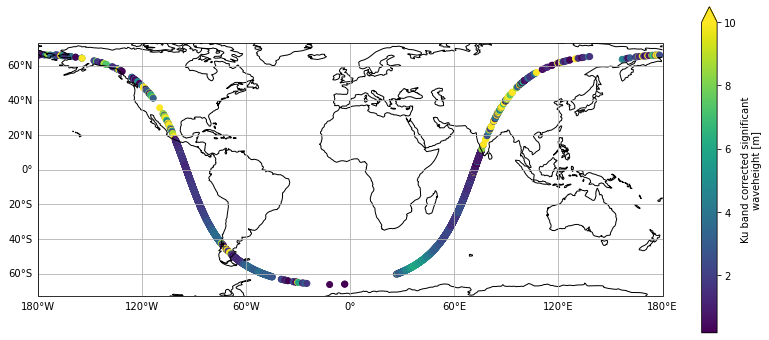

In [24]:
plt.figure(figsize=(14,6)) #(17,5)

ax1 = plt.subplot(111, projection=ccrs.PlateCarree())
ds.plot.scatter(x="lon", y="lat", hue="swh_ku", vmax=10, ax=ax1, transform=ccrs.PlateCarree())
# air.plot.contourf(ax=ax)
ax1.coastlines()
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

Esto es una visualización rápida de los datos, necesitarían un procesado para quedarnos con los valores que queremos en el océano.

## 4. Wavewatch 3

Base de datos: NOAA Coastwatch https://coastwatch.pfeg.noaa.gov/erddap/griddap/NWW3_Global_Best.html

Metodo: ERDDAP

Fuente: https://github.com/oceanhackweek/ohw22-proj-oleaje-costeros/blob/main/wavewatch3/WW3-CW-ERDDAP.ipynb

Datos de WW3 extraídos del servidor de ERDDAP de NOAA Coastwatch. Este notebook extrae datos multidimensionales basados en la región geográfica (bounding box) y período especificados. Incluye la región entre Ecuador y Perú. El notebook en estos momentos no exporta los datos extraídos a un archivo, pero sería fácil exportarlo a netcdf.

Apuntes:
* La longitud de estos datos está en el formato 0 a 360 en vez de -180 a +180
* El sitio http://bboxfinder.com es muy útil para escoger el bounding box de cada región

In [3]:
e = ERDDAP(
    server="CSWC",  # CoastWatch West Coast Node
    protocol="griddap",  # Protocol for gridded datasets
)

e.dataset_id = "NWW3_Global_Best" 

In [4]:
e.griddap_initialize()

# puede tardar un poco...

In [5]:
print(f"variables in this dataset:\n\n{e.variables}")
print(
    f"\nconstraints of this dataset:\n\n{json.dumps(e.constraints, indent=1)}"
)

variables in this dataset:

['Tdir', 'Tper', 'Thgt', 'sdir', 'sper', 'shgt', 'wdir', 'wper', 'whgt']

constraints of this dataset:

{
 "time>=": "2023-02-27T18:00:00Z",
 "time<=": "2023-02-27T18:00:00Z",
 "time_step": 1,
 "depth>=": 0.0,
 "depth<=": 0.0,
 "depth_step": 1,
 "latitude>=": -77.5,
 "latitude<=": 77.5,
 "latitude_step": 1,
 "longitude>=": 0.0,
 "longitude<=": 359.5,
 "longitude_step": 1
}


Especifiquemos que variables vamos a obtener de ERDDAP, para no lidiar con todas. Elegimos shgt (swell significant wave height) y Thgt (significant wave height), ambas en metros:

In [6]:
e.variables = ['shgt', 'Thgt']


Especifiquemos el periodo temporal que usaremos en común en las dos regiones

Por ahora vamos a enfocarnos en el año 2020

In [7]:
dt_comienzo = datetime.datetime(2020, 1, 1)
dt_final = datetime.datetime(2020, 12, 31)


In [8]:
e.constraints.update(
    {
        "time>=": f"{dt_comienzo}Z", # "2021-08-1 00:00:00Z",
        "time<=": f"{dt_final}Z", # "2021-08-31 23:00:00Z",
    }
)

In [9]:
def bounds2contraints(bounds):
    return {
        "longitude>=": bounds[0] + 360,
        "longitude<=": bounds[2] + 360,
        "latitude>=": bounds[1],
        "latitude<=": bounds[3],
    }

## 4.1. Ejemplo para una zona en Ecuador-Perú

In [10]:
ecper_bounding_box = [-82.5, -5, -80, -2]


In [11]:
e_ecper = e


In [12]:
e_ecper.constraints.update(bounds2contraints(ecper_bounding_box))


Seleccionamos un periodo de 6 meses:

In [14]:
dt_comienzo_ecper = datetime.datetime(2020, 6, 1)
dt_final_ecper = datetime.datetime(2020, 12, 31)

In [15]:
e_ecper.constraints.update(
    {
        "time>=": f"{dt_comienzo_ecper}Z", # "2021-08-1 00:00:00Z",
        "time<=": f"{dt_final_ecper}Z", # "2021-08-31 23:00:00Z",
    }
)

Ahora ya tenemos listas todas las constraints y variables que vamos a bajar:

In [17]:
e_ecper.constraints


{'time>=': '2020-06-01 00:00:00Z',
 'time<=': '2020-12-31 00:00:00Z',
 'time_step': 1,
 'depth>=': 0.0,
 'depth<=': 0.0,
 'depth_step': 1,
 'latitude>=': -5,
 'latitude<=': -2,
 'latitude_step': 1,
 'longitude>=': 277.5,
 'longitude<=': 280,
 'longitude_step': 1}

In [18]:
ds_ecper = e_ecper.to_xarray()

# puede tardar un poco...

In [19]:
ds_ecper


<xarray.Dataset>
Dimensions:    (time: 5113, depth: 1, latitude: 7, longitude: 6)
Coordinates:
  * time       (time) datetime64[ns] 2020-06-01 ... 2020-12-31
  * depth      (depth) float32 0.0
  * latitude   (latitude) float32 -5.0 -4.5 -4.0 -3.5 -3.0 -2.5 -2.0
  * longitude  (longitude) float32 277.5 278.0 278.5 279.0 279.5 280.0
Data variables:
    shgt       (time, depth, latitude, longitude) float32 ...
    Thgt       (time, depth, latitude, longitude) float32 ...
Attributes: (12/68)
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    acknowledgement:               The Pacific Islands Ocean Observing System...
    cdm_data_type:                 Grid
    comment:                       Model runs produced by Kwok Fai Cheung (ch...
    Conventions:                   CF-1.6, ACDD-1.3
    creator_email:                 cheung@hawaii.edu
    ...                            ...
    testOutOfDate:                 now+105hours
    time_coverage_end:             2020-12-31T00:00:00Z
    time_coverage_resolution:      PT1H
    time_coverage_start:           2020-06-01T00:00:00Z
    title:                         WaveWatch III (WW3) Global Wave Model
    Westernmost_Easting:           277.5

Una gráfica geográfica en uno de los pasos de tiempo, mostrando la costa como referencia.


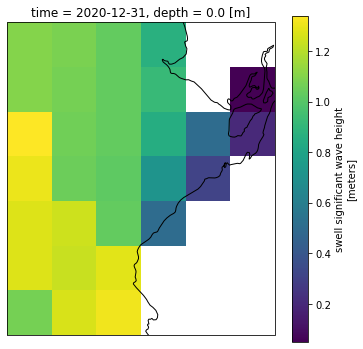

In [20]:
fig, ax = plt.subplots(
    figsize=(6, 6), subplot_kw={"projection": ccrs.PlateCarree()},
)

ds_ecper.shgt.isel(time=-1).plot(ax=ax)

ax.coastlines();

Una gráfica de la serie temporal en un pixel:

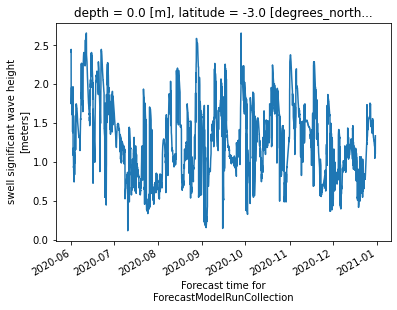

In [21]:
ds_ecper.shgt.sel(latitude=-3, longitude=277, method='nearest').plot();


## 5. Gliders

https://ioos.github.io/ioos_code_lab/content/code_gallery/data_access_notebooks/2016-11-15-glider_data_example.html

In [2]:
url = (
    "https://data.ioos.us/thredds/dodsC/deployments/rutgers/"
    "ru29-20150623T1046/ru29-20150623T1046.nc3.nc"
)

In [3]:
xr.set_options(keep_attrs=True)
ds = xr.open_dataset(url)

Usamos la función squeeze para dehacernos de la coordenada trayectoría (trajectory) de los datos, porque nos interesa graficar solo los perfiles como una sección.

In [4]:
tem = ds.cf["sea_water_temperature"].squeeze()
sal = ds.cf["sea_water_temperature"].squeeze()
den = ds.cf["sea_water_density"].squeeze()

tem

<xarray.DataArray 'temperature' (profile: 542, obs: 483)>
[261786 values with dtype=float32]
Coordinates:
    trajectory      <U18 'ru29-20150623T1046'
    temperature_qc  (profile, obs) float32 ...
    time            (profile) datetime64[ns] 2015-06-23T10:57:59.290227712 .....
    latitude        (profile) float64 -25.49 -25.51 -25.53 ... -34.07 -34.07
    longitude       (profile) float64 -44.91 -44.92 -44.92 ... 13.49 13.48 13.48
    depth           (profile, obs) float32 8.99 15.81 22.42 ... nan nan nan
Dimensions without coordinates: profile, obs
Attributes:
    _ChunkSizes:          1
    actual_range:         [ 3.744  24.5387]
    ancillary_variables:  temperature_qc
    colorBarMaximum:      32.0
    colorBarMinimum:      0.0
    instrument:           instrument_ctd
    ioos_category:        Temperature
    long_name:            Sea Water Temperature
    observation_type:     measured
    platform:             platform
    standard_name:        sea_water_temperature
    units:                Celsius
    valid_max:            40.0
    valid_min:            -5.0

Graficar los datos de glider no es trivial. Lo primero que hay que hacer es graficar el trayecto del glider para comprobar su recorrido.

In [5]:
x = tem.cf["X"]
y = tem.cf["Y"]

ubicacion = y.mean(), x.mean()  # Centro del trayecto
ubicaciones = list(zip(y, x))  # Puntos del trayecto

In [6]:
tiles = (
    "http://services.arcgisonline.com/arcgis/rest/services/"
    "World_Topo_Map/MapServer/MapServer/tile/{z}/{y}/{x}"
)

m = folium.Map(ubicacion, tiles=tiles, attr="ESRI", zoom_start=4)

folium.CircleMarker(ubicaciones[0], fill_color="green", radius=10).add_to(m)
folium.CircleMarker(ubicaciones[-1], fill_color="red", radius=10).add_to(m)

line = folium.PolyLine(
    locations=ubicaciones,
    color="orange",
    weight=8,
    opacity=0.6,
    popup="Slocum Glider ru29 Deployed on 2015-06-23",
).add_to(m)

m

Uno podría estar interesado/a en los perfiles individuales de cada inmersión. Vamos a extraer la inmersión más profunda y a graficarla.

In [7]:
# Primero buscamos el perfil más profundo:
idx = np.nonzero(~np.ma.masked_invalid(tem[:, -1]).mask)[0][0]

z = tem.cf["Z"]
t = tem.cf["T"]

vmin, vmax = z.attrs["actual_range"]
z = np.ma.masked_outside(z.to_numpy(), vmin, vmax)

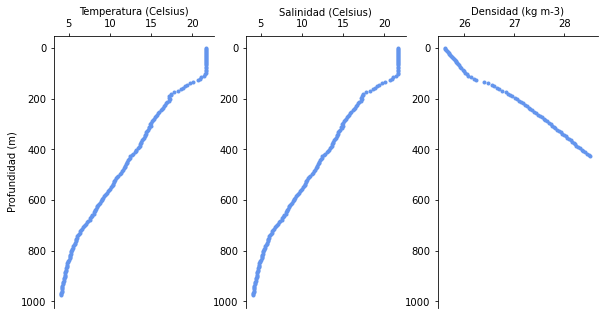

In [8]:
ncols = 3
fig, (ax0, ax1, ax2) = plt.subplots(
    sharey=True, sharex=False, ncols=ncols, figsize=(3.25 * ncols, 5)
)

kw = dict(linewidth=2, color="cornflowerblue", marker=".")
ax0.plot(tem[idx], z[idx], **kw)
ax1.plot(sal[idx], z[idx], **kw)
ax2.plot(den[idx] - 1000, z[idx], **kw)


def spines(ax):
    ax.spines["right"].set_color("none")
    ax.spines["bottom"].set_color("none")
    ax.xaxis.set_ticks_position("top")
    ax.yaxis.set_ticks_position("left")


[spines(ax) for ax in (ax0, ax1, ax2)]

ax0.set_ylabel("Profundidad (m)")
ax0.set_xlabel(f"Temperatura ({tem.units})")
ax0.xaxis.set_label_position("top")

ax1.set_xlabel(f"Salinidad ({sal.units})")
ax1.xaxis.set_label_position("top")

ax2.set_xlabel(f"Densidad ({den.units})")
ax2.xaxis.set_label_position("top")

ax0.invert_yaxis()


También podemos visualizar el trayecto completo como una sección transversal

In [12]:
def distance(x, y, units="km"):
    dist, pha = sw.dist(x, y, units=units)
    return np.r_[0, np.cumsum(dist)]


def plot_glider(
    x, y, z, t, data, cmap=plt.cm.viridis, figsize=(11, 3.75)):

    fig, ax = plt.subplots(figsize=figsize)
    dist = distance(x, y, units="km")
    z = np.abs(z)
    dist, z = np.broadcast_arrays(dist[..., np.newaxis], z)
    cs = ax.scatter(dist, z, s=5, c=data, cmap=cmap)
    kw = dict(orientation="vertical", extend="both", shrink=0.65)
    cbar = fig.colorbar(cs, **kw)

    ax.invert_yaxis()
    ax.set_xlabel("Distancia (km)")
    ax.set_ylabel("Profundidad (m)")
    return fig, ax, cbar


Datos recogidos desde 2015-06-23T10:57:59.290227712 a 2016-03-31T09:25:31.420480512


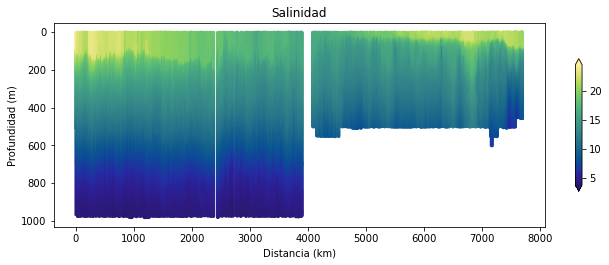

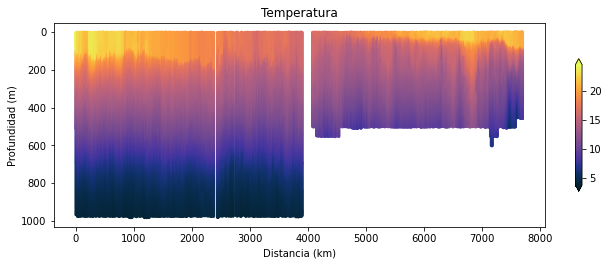

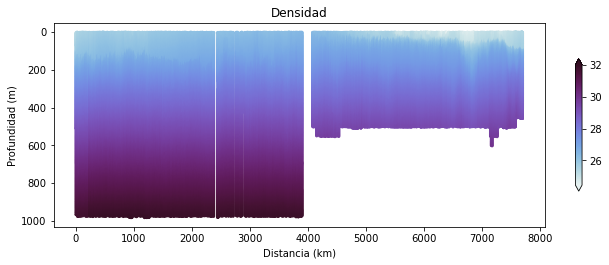

In [13]:
haline = cmocean.sequential.Haline_20.mpl_colormap
thermal = cmocean.sequential.Thermal_20.mpl_colormap
dense = cmocean.sequential.Dense_20.mpl_colormap


fig, ax, cbar = plot_glider(x, y, z, t, sal, cmap=haline)
cbar.ax.set_xlabel("(g kg$^{-1}$)")
cbar.ax.xaxis.set_label_position("top")
ax.set_title("Salinidad")

fig, ax, cbar = plot_glider(x, y, z, t, tem, cmap=thermal)
cbar.ax.set_xlabel(r"($^\circ$C)")
cbar.ax.xaxis.set_label_position("top")
ax.set_title("Temperatura")

fig, ax, cbar = plot_glider(x, y, z, t, den - 1000, cmap=dense)
cbar.ax.set_xlabel(r"(kg m$^{-3}$C)")
cbar.ax.xaxis.set_label_position("top")
ax.set_title("Densidad")

print(f"Datos recogidos desde {t[0].to_numpy()} a {t[-1].to_numpy()}")

La sección transversal del glider también es muy útil, pero tenemos que tener cuidado al interpretarla debido a las muchas vueltas que tomó el glider, y el tiempo que tomó para completar la trayecto.

Tenga en cuenta que el eje x puede ser tiempo o distancia. ¡Fíjese en que este trayecto en particular tardó ~ 281 días en completarse!

# 2.6. Enlaces para acceso a datos online en R:
* En español : https://www.youtube.com/watch?v=1O1RoXyet5g&t=1229s
* En inglés: https://oceanhackweek.org/ohw22/tutorials-index/data-access-in-r.html

# 3. Agradecimientos y referencias

* Filipe Fernandes, Emilio Mayorga

* https://portal.aoos.org/help/overview.html 
